In [1]:
import nibabel as nib
import numpy as np
import nilearn.plotting as nip
import seaborn as sns

In [2]:
dir_mediation = '/Users/tspisak/projects/PIC_conditioning_withinsub_nodatalad/img_mediation_bootstrap'

In [3]:
!ls /Users/tspisak/projects/PIC_conditioning_withinsub_nodatalad/img_mediation_bootstrap

M-Y_effect.hdr               X-M_effect.img
M-Y_effect.img               X-M_pvals.hdr
M-Y_pvals.hdr                X-M_pvals.img
M-Y_pvals.img                clusters_with_extracted_data
X-M-Y_effect.hdr             img_mediation_bootstrap
X-M-Y_effect.img             med_results.mat
X-M-Y_pvals.hdr              mediation_SETUP.mat
X-M-Y_pvals.img              published_output
X-M_effect.hdr


In [4]:
mask = nib.load(f'{dir_mediation}/../full_masked_10_percent.nii')
mask_data = mask.get_fdata()

zero p-vals within mask: 0


/var/folders/69/9f3dwqj10pg8d4jmjfkrvpww0000gn/T/ipykernel_92965/1961137675.py:9: RuntimeWarning: divide by zero encountered in log10
  nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z',
/Users/tspisak/Dropbox/src/placebo-conditioning-meta-analysis/venv/lib/python3.12/site-packages/nilearn/plotting/img_plotting.py:1317: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  safe_get_data(stat_map_img, ensure_finite=True),
/var/folders/69/9f3dwqj10pg8d4jmjfkrvpww0000gn/T/ipykernel_92965/1961137675.py:11: RuntimeWarning: divide by zero encountered in log10
  nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z',


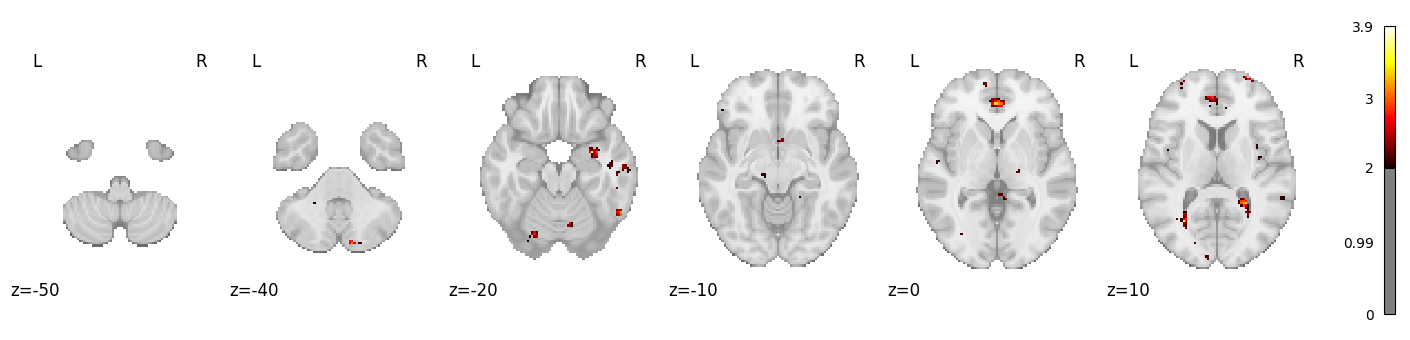

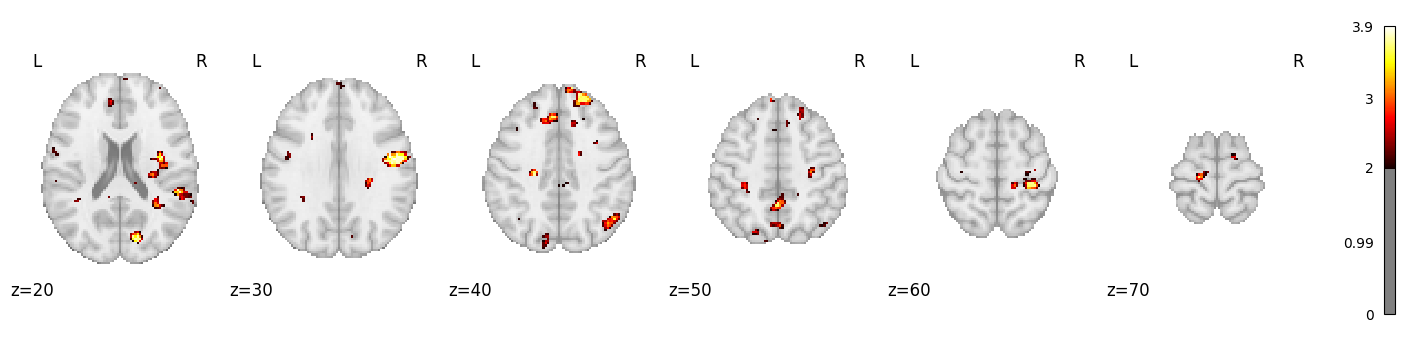

In [14]:
# X-M
pval = nib.load(f'{dir_mediation}/X-M_pvals.hdr')
pval_data = pval.get_fdata()
np.min(pval_data)
pval0 = np.zeros_like(pval_data)
pval0[pval_data==0] = 1
pval0 *= mask_data
print('zero p-vals within mask:', np.sum(pval0==1))
nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z', 
                  cut_coords=[-50, -40, -20, -10, 0, 10],  cmap='cold_hot', threshold=2)
nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z', 
                  cut_coords=[20, 30, 40, 50, 60, 70],  cmap='cold_hot', threshold=2)

array([1.13687085e-04, 1.18222524e-04, 1.21346922e-04, ...,
       9.99999940e-01, 1.00000000e+00, 1.00000000e+00])

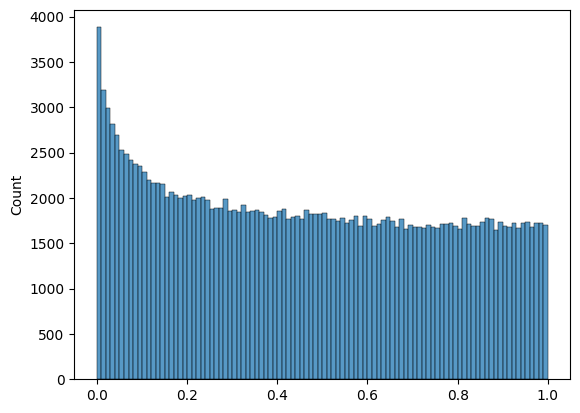

In [15]:
sns.histplot(pval_data[mask_data>0], bins=100)
np.sort(pval_data[mask_data>0])

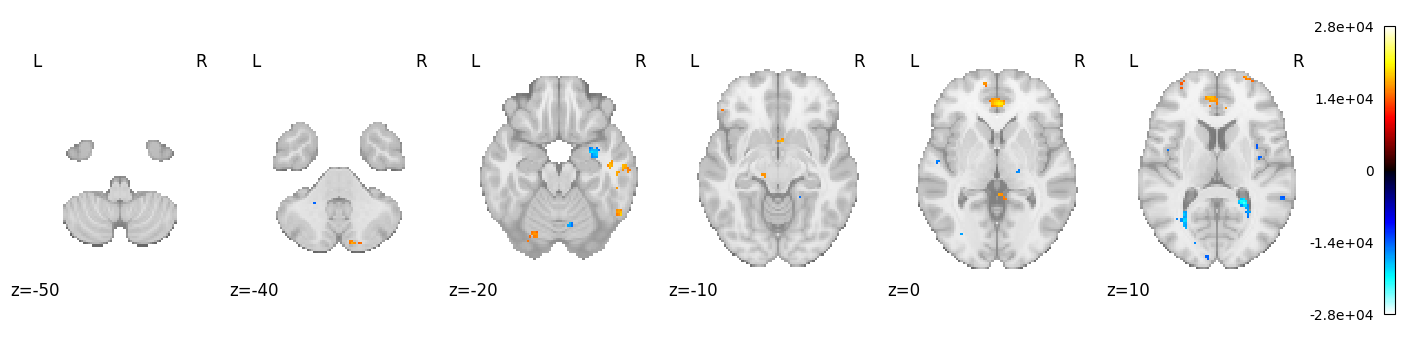

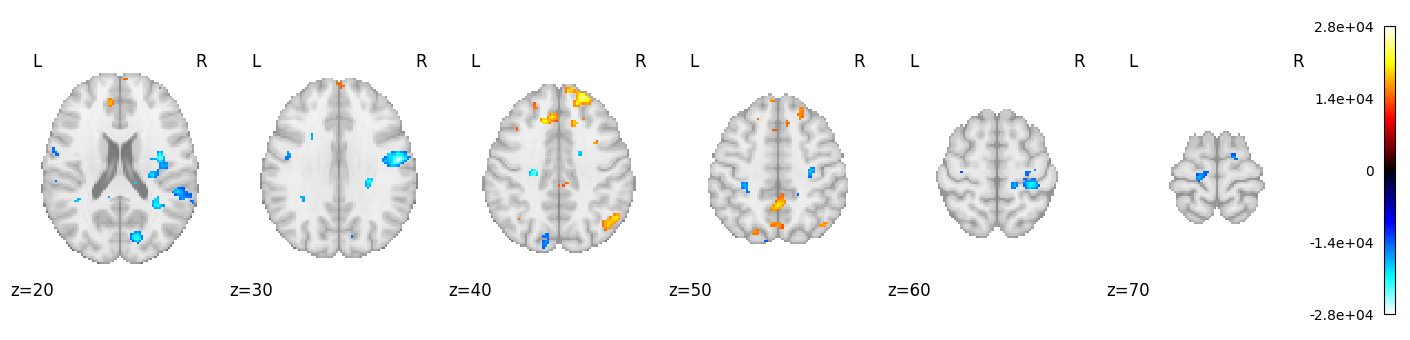

In [17]:
# X-M effect
effect = nib.load(f'{dir_mediation}/X-M_effect.hdr')
effect_data = effect.get_fdata()
effect_data[pval_data>0.01] = 0
nip.plot_stat_map(nib.Nifti2Image(effect_data, affine=pval.affine),display_mode='z', 
                  cut_coords=[-50, -40, -20, -10, 0, 10],  cmap='cold_hot', threshold=2)
nip.plot_stat_map(nib.Nifti2Image(effect_data, affine=pval.affine),display_mode='z', 
                  cut_coords=[20, 30, 40, 50, 60, 70],  cmap='cold_hot', threshold=2)

zero p-vals within mask: 0


/var/folders/69/9f3dwqj10pg8d4jmjfkrvpww0000gn/T/ipykernel_92965/4116506364.py:9: RuntimeWarning: divide by zero encountered in log10
  nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z',
/Users/tspisak/Dropbox/src/placebo-conditioning-meta-analysis/venv/lib/python3.12/site-packages/nilearn/plotting/img_plotting.py:1317: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  safe_get_data(stat_map_img, ensure_finite=True),
/var/folders/69/9f3dwqj10pg8d4jmjfkrvpww0000gn/T/ipykernel_92965/4116506364.py:11: RuntimeWarning: divide by zero encountered in log10
  nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z',


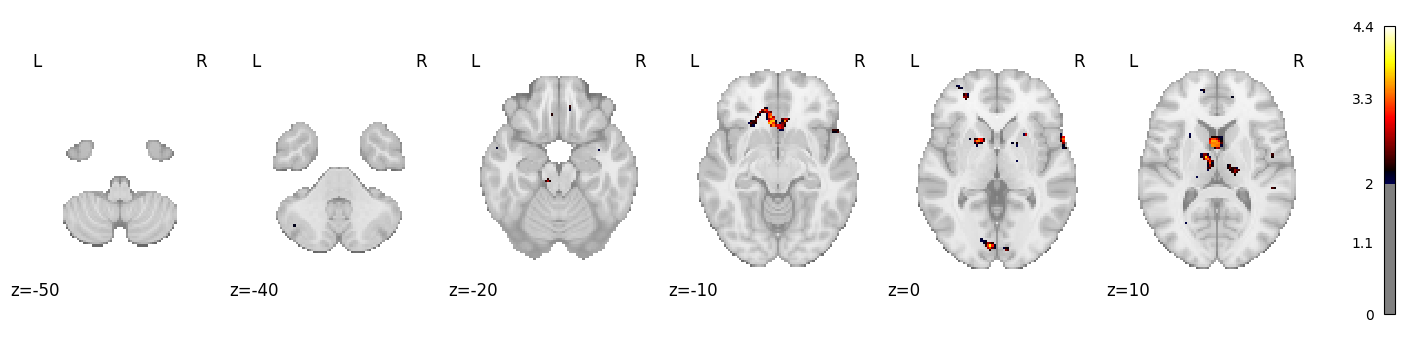

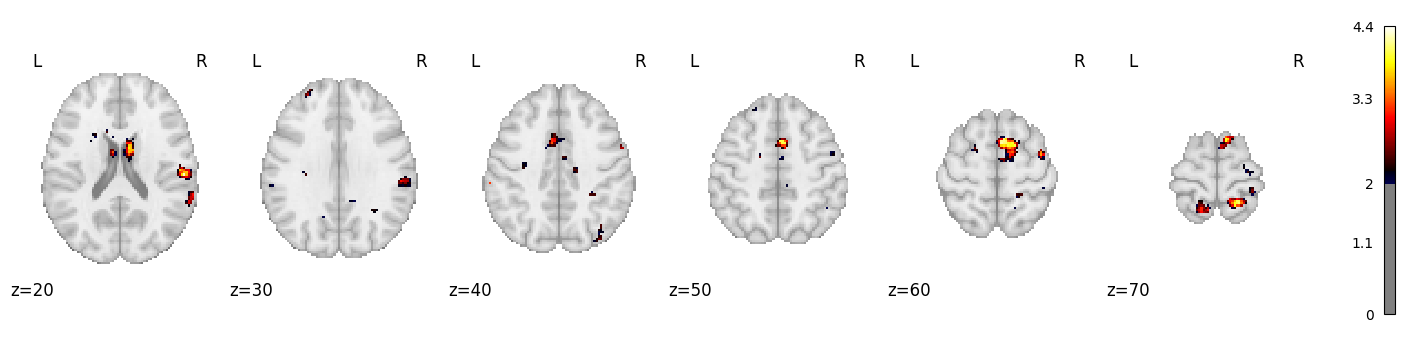

In [22]:
# M-Y
pval = nib.load(f'{dir_mediation}/M-Y_pvals.img')
pval_data = pval.get_fdata()
np.min(pval_data)
pval0 = np.zeros_like(pval_data)
pval0[pval_data==0] = 1
pval0 *= mask_data
print('zero p-vals within mask:', np.sum(pval0==1))
nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z', 
                  cut_coords=[-50, -40, -20, -10, 0, 10],  cmap='cold_hot', threshold=2)
nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z', 
                  cut_coords=[20, 30, 40, 50, 60, 70],  cmap='cold_hot', threshold=2)

array([3.83376027e-05, 4.92324652e-05, 5.38557870e-05, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

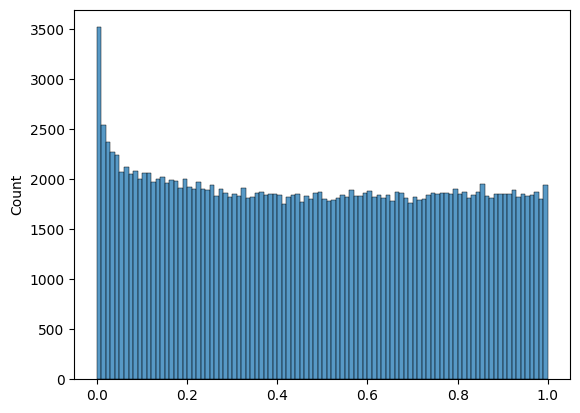

In [23]:
sns.histplot(pval_data[mask_data>0], bins=100)
np.sort(pval_data[mask_data>0])

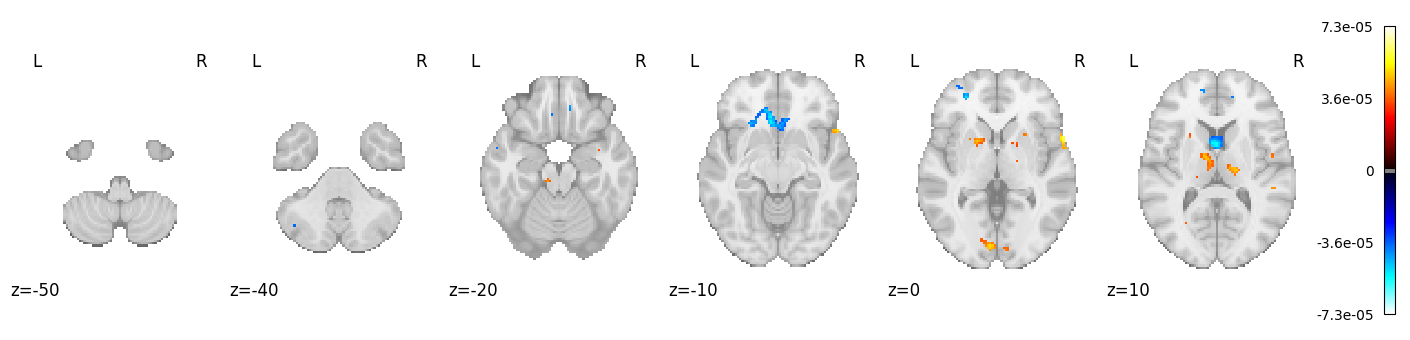

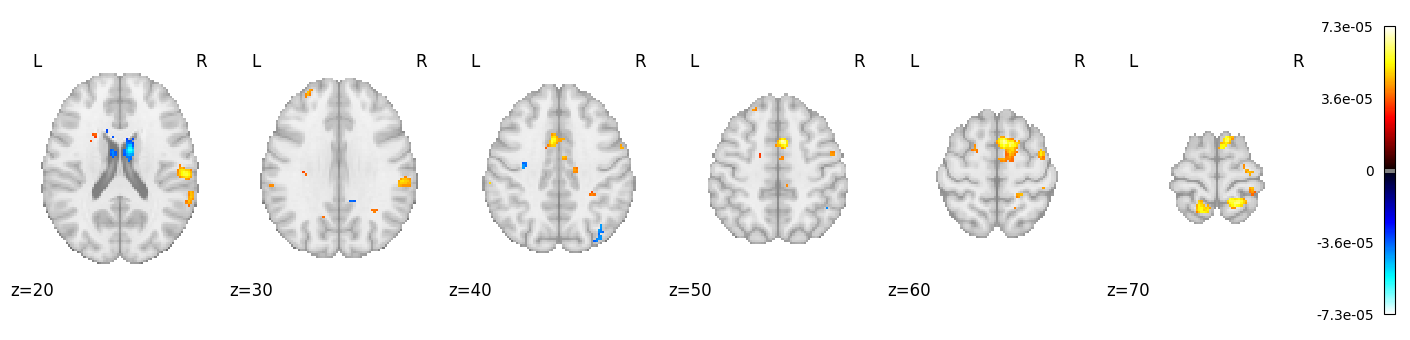

In [24]:
# M-Y effect
effect = nib.load(f'{dir_mediation}/M-Y_effect.hdr')
effect_data = effect.get_fdata()
effect_data[pval_data>0.01] = 0

nip.plot_stat_map(nib.Nifti2Image(effect_data, affine=pval.affine),display_mode='z', 
                  cut_coords=[-50, -40, -20, -10, 0, 10],  cmap='cold_hot')
nip.plot_stat_map(nib.Nifti2Image(effect_data, affine=pval.affine),display_mode='z', 
                  cut_coords=[20, 30, 40, 50, 60, 70],  cmap='cold_hot')

zero p-vals within mask: 0


/var/folders/69/9f3dwqj10pg8d4jmjfkrvpww0000gn/T/ipykernel_92965/1460884914.py:9: RuntimeWarning: divide by zero encountered in log10
  nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z',
/Users/tspisak/Dropbox/src/placebo-conditioning-meta-analysis/venv/lib/python3.12/site-packages/nilearn/plotting/img_plotting.py:1317: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  safe_get_data(stat_map_img, ensure_finite=True),
/var/folders/69/9f3dwqj10pg8d4jmjfkrvpww0000gn/T/ipykernel_92965/1460884914.py:11: RuntimeWarning: divide by zero encountered in log10
  nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z',


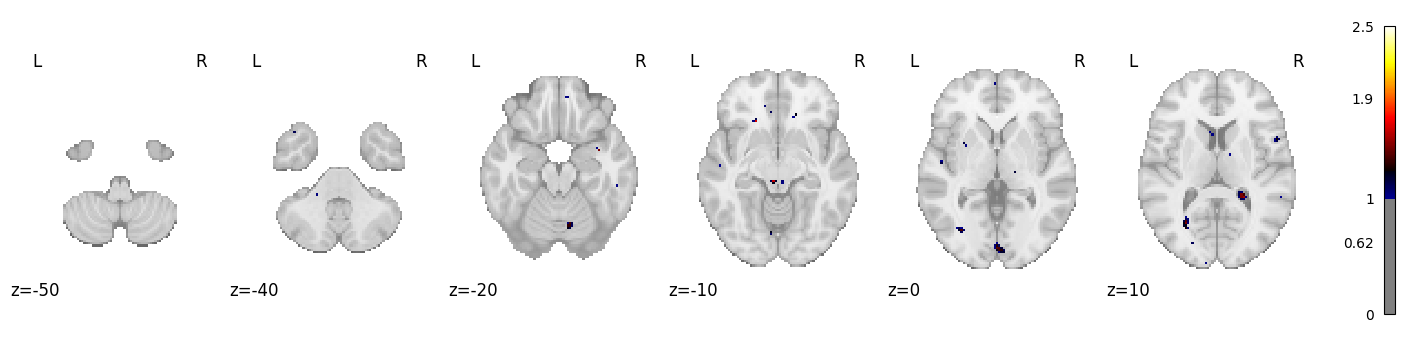

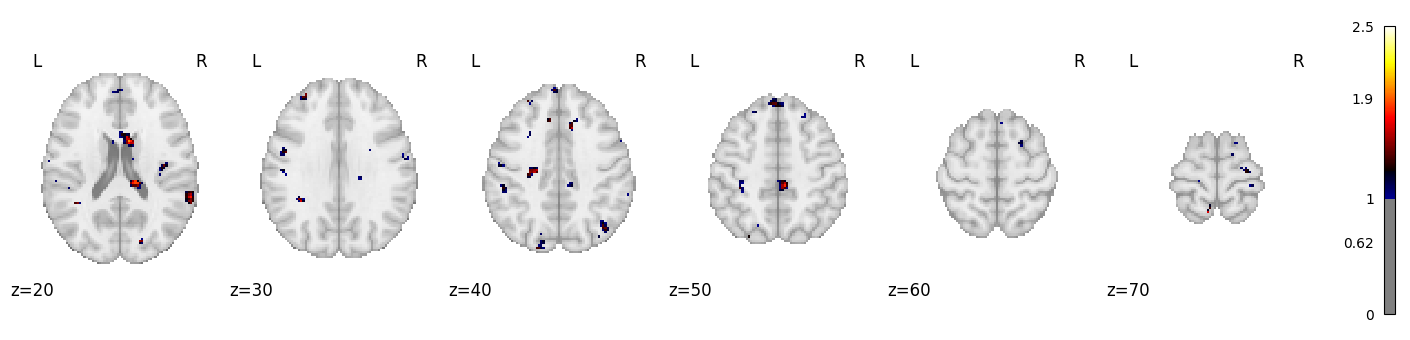

In [25]:
# X-M-Y
pval = nib.load(f'{dir_mediation}/X-M-Y_pvals.img')
pval_data = pval.get_fdata()
np.min(pval_data)
pval0 = np.zeros_like(pval_data)
pval0[pval_data==0] = 1
pval0 *= mask_data
print('zero p-vals within mask:', np.sum(pval0==1))
nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z', 
                  cut_coords=[-50, -40, -20, -10, 0, 10],  cmap='cold_hot', threshold=1)
nip.plot_stat_map(nib.Nifti2Image(-np.log10(pval_data), affine=pval.affine),display_mode='z', 
                  cut_coords=[20, 30, 40, 50, 60, 70],  cmap='cold_hot', threshold=1)

array([0.00327595, 0.00330112, 0.0054599 , ..., 0.99999988, 1.        ,
       1.        ])

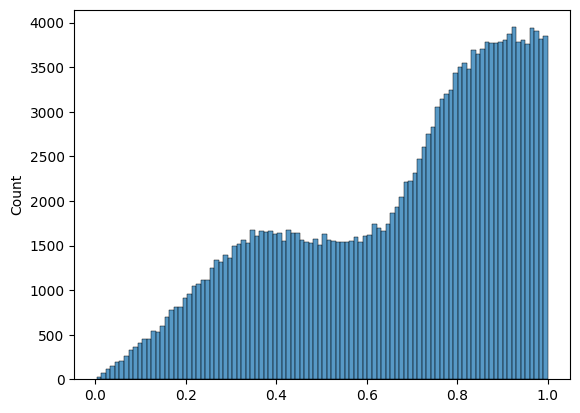

In [26]:
sns.histplot(pval_data[mask_data>0], bins=100)
np.sort(pval_data[mask_data>0])

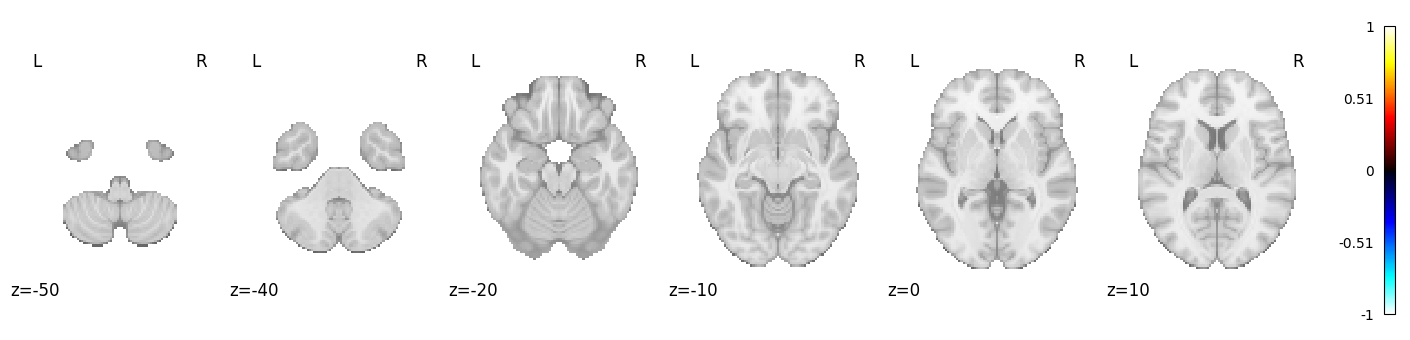

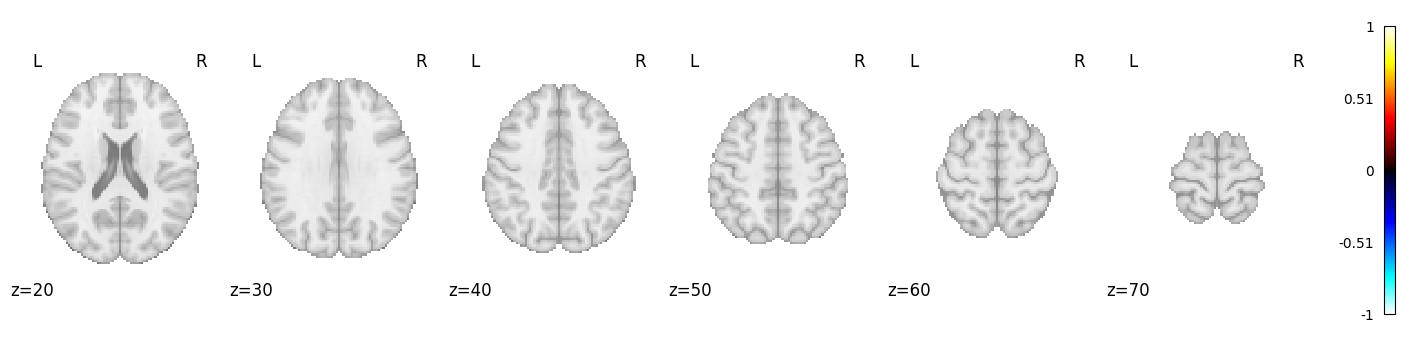

In [27]:
# X-M-Y effect
effect = nib.load(f'{dir_mediation}/X-M-Y_effect.hdr')
effect_data = effect.get_fdata()
effect_data[pval_data>0.01] = 0

nip.plot_stat_map(nib.Nifti2Image(effect_data, affine=pval.affine),display_mode='z', 
                  cut_coords=[-50, -40, -20, -10, 0, 10],  cmap='cold_hot')
nip.plot_stat_map(nib.Nifti2Image(effect_data, affine=pval.affine),display_mode='z', 
                  cut_coords=[20, 30, 40, 50, 60, 70],  cmap='cold_hot')

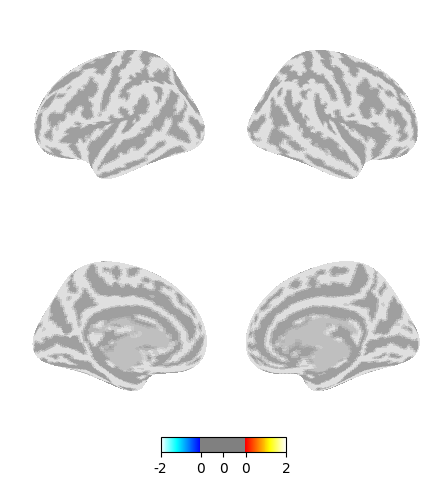

In [11]:
from nilearn import surface
from nilearn import plotting

plotting.plot_img_on_surf(nib.Nifti2Image(pval0, affine=pval.affine),
                          surf_mesh='fsaverage5', # high-res: 'fsaverage', low-res: 'fsaverage5#
                          views=['lateral', 'medial'],
                          hemispheres=['left', 'right'],
                          threshold = 0.9,
                          inflate=True,
                          darkness=0.5,
                          cmap='cold_hot', vmax=2.5, vmin=-2.5,
                          colorbar=True)
plotting.show()